## Simulation environment: hard or easy?

In the main paper, we only provide one simulation environment. It is interesting to explore how our policy responds to different environment. We design the following environments and compare with baseline algorithms respectively:   
1) Easy:  
2) Hard:the environment we use in the main paper.  
Although our sub-optimal bound is proved based on the IHR assumption, we also test the performance of our policy to environments which are not satisfied the IHR assumption.  
3) With outliers:  

In [1]:
# direct to proper path
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
from ipywidgets import IntProgress
from IPython.display import display
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
import pickle
from prettytable import PrettyTable

from codes.UCB_discrete import M_UCB, UCB1, UCB_V, MV_LCB, Exp3, epsilon_greedy, Median_of_Means_UCB, U_UCB
from codes.Environment import Mixture_AbsGau, setup_env, Exp, Exp_Outlier, Weibull
from codes.SimulatedGames import simulate
from codes.plots import plot_hist, plot_eva

%matplotlib inline

In [2]:
results_diff_envs = defaultdict(dict)
true_L = defaultdict(dict)

num_arms = 3

arm_name_dict = {
    0: 'A',
    1: 'B',
    2: 'C'
}

num_exper = 10
num_rounds = 1000

est_flag = True # estimate the lower bound of hazard rate L

est_name_dict = {True: 'est_L_',
                False: 'true_L_'}


def show_envs(medians, means):
    for key in medians.keys():
        print(key)
        medians[key] = list(np.around(np.array(medians[key]),2))
        means[key] = list(np.around(np.array(means[key]),2))
        t = PrettyTable(['Eva', 'A', 'B', 'C', 'Best Arm'])
        t.add_row(['Median'] + medians[key]+ [arm_name_dict[np.argmax(medians[key])]])
        t.add_row(['Mean']+ means[key]+ [arm_name_dict[np.argmax(means[key])]])
        #t.add_row(['MV']+ mvs[key]+ [arm_name_dict[np.argmin(mvs[key])]])
        print(t)
        print()
    
    plot_hist(samples)
    
    return medians, means

def run_exper(results, rewards_env, hyperpara_list, num_exper, num_rounds, policy, summary_stats, est_flags = [est_flag], fixed_L = None):
    for key in rewards_env.keys():
        for hyperpara in hyperpara_list:
            for est_flag in est_flags:
                name = key + '_' + str(num_exper) + '_' + str(num_rounds)
                policy_name = str(policy).split('.')[-1].split('\'')[0] + '-'
                subname = policy_name + str(hyperpara) + est_name_dict[est_flags[0]] + str(fixed_L)
                print(name + subname)
                p = IntProgress(max = num_exper)
                p.description = 'Running'
                display(p)
                results[name][subname]= simulate(rewards_env[key],summary_stats[key], policy, num_exper, num_rounds, est_flag, hyperpara, fixed_L, p)
                
                # calculate true L
            
                true_L[name][subname] = []
                for i in range(len(rewards_env[key])):
                    my_env = rewards_env[key][i]
                    if hasattr(my_env, 'hazard_rate'):
                        # for Mixture_AbsGau only
                        L = my_env.hazard_rate(0)
                        true_L[name][subname].append(L)
                    elif hasattr(my_env, 'pdf'):
                        # if pdf and cdf is defined
                        L = my_env.pdf(0)/ (1- my_env.cdf(0)) 
                        true_L[name][subname].append(L)
                    else:
                        print('cannot estimate L')

Mixture_AbsGau_[[0, 1, 0, 1, 1], [10, 1, 0, 1, 1]]Exp_[0.2]
+--------+------+------+------+----------+
|  Eva   |  A   |  B   |  C   | Best Arm |
+--------+------+------+------+----------+
| Median | 0.67 | 9.99 | 3.41 |    B     |
|  Mean  | 0.8  | 10.0 | 4.95 |    B     |
+--------+------+------+------+----------+

Mixture_AbsGau_[[3, 1, 0, 1, 1], [1.2, 4, 0, 1, 1]]Exp_[0.2857142857142857]
+--------+------+-----+------+----------+
|  Eva   |  A   |  B  |  C   | Best Arm |
+--------+------+-----+------+----------+
| Median | 3.01 | 2.8 | 2.39 |    A     |
|  Mean  | 3.02 | 3.3 | 3.49 |    C     |
+--------+------+-----+------+----------+

Mixture_AbsGau_[[0, 0.5, 10, 0.1, 0.95], [0, 0.1, 10, 0.1, 0.95]]Exp_Outlier_[1]
+--------+------+------+------+----------+
|  Eva   |  A   |  B   |  C   | Best Arm |
+--------+------+------+------+----------+
| Median | 0.35 | 0.07 | 0.76 |    C     |
|  Mean  | 0.85 | 0.56 | 1.98 |    C     |
+--------+------+------+------+----------+

Mixture_AbsG

IntProgress(value=0, description='Running', max=10)

Mixture_AbsGau_[[3, 1, 0, 1, 1], [1.2, 4, 0, 1, 1]]Exp_[0.2857142857142857]_10_1000M_UCB-[1.5, 1, 1]est_L_None


IntProgress(value=0, description='Running', max=10)

Mixture_AbsGau_[[0, 0.5, 10, 0.1, 0.95], [0, 0.1, 10, 0.1, 0.95]]Exp_Outlier_[1]_10_1000M_UCB-[1.5, 1, 1]est_L_None


IntProgress(value=0, description='Running', max=10)

Mixture_AbsGau_[[0, 1, 0, 1, 1], [10, 1, 0, 1, 1]]Exp_[0.2]_10_1000U_UCB-[4]est_L_None


IntProgress(value=0, description='Running', max=10)

Mixture_AbsGau_[[3, 1, 0, 1, 1], [1.2, 4, 0, 1, 1]]Exp_[0.2857142857142857]_10_1000U_UCB-[4]est_L_None


IntProgress(value=0, description='Running', max=10)

Mixture_AbsGau_[[0, 0.5, 10, 0.1, 0.95], [0, 0.1, 10, 0.1, 0.95]]Exp_Outlier_[1]_10_1000U_UCB-[4]est_L_None


IntProgress(value=0, description='Running', max=10)

Mixture_AbsGau_[[0, 1, 0, 1, 1], [10, 1, 0, 1, 1]]Exp_[0.2]_10_1000epsilon_greedy-[0.1]est_L_None


IntProgress(value=0, description='Running', max=10)

Mixture_AbsGau_[[3, 1, 0, 1, 1], [1.2, 4, 0, 1, 1]]Exp_[0.2857142857142857]_10_1000epsilon_greedy-[0.1]est_L_None


IntProgress(value=0, description='Running', max=10)

Mixture_AbsGau_[[0, 0.5, 10, 0.1, 0.95], [0, 0.1, 10, 0.1, 0.95]]Exp_Outlier_[1]_10_1000epsilon_greedy-[0.1]est_L_None


IntProgress(value=0, description='Running', max=10)

Mixture_AbsGau_[[0, 1, 0, 1, 1], [10, 1, 0, 1, 1]]Exp_[0.2]_10_1000Median_of_Means_UCB-[10, 1, 1]est_L_None


IntProgress(value=0, description='Running', max=10)

Mixture_AbsGau_[[3, 1, 0, 1, 1], [1.2, 4, 0, 1, 1]]Exp_[0.2857142857142857]_10_1000Median_of_Means_UCB-[10, 1, 1]est_L_None


IntProgress(value=0, description='Running', max=10)

Mixture_AbsGau_[[0, 0.5, 10, 0.1, 0.95], [0, 0.1, 10, 0.1, 0.95]]Exp_Outlier_[1]_10_1000Median_of_Means_UCB-[10, 1, 1]est_L_None


IntProgress(value=0, description='Running', max=10)

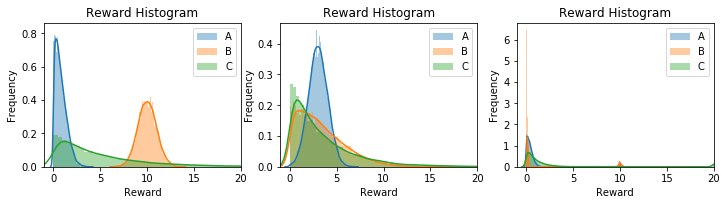

In [3]:
environments = [
    {Mixture_AbsGau: [[0, 1, 0,1, 1], [10, 1, 0, 1, 1]], Exp: [1.0/5]}, # Easy
    {Mixture_AbsGau: [[3, 1, 0,1, 1], [1.2, 4, 0, 1, 1]], Exp: [1/3.5]}, # Hard
    {Mixture_AbsGau: [[0, 0.5, 10, 0.1, 0.95], [0, 0.1, 10, 0.1, 0.95]], Exp_Outlier: [1]},  # With Outliers
]

rewards_env, medians, means, mvs, samples = setup_env(num_arms, environments)

medians, means = show_envs(medians, means)

hyperpara_list = [[1.5,1,1]]
run_exper(results_diff_envs, rewards_env, hyperpara_list, num_exper, num_rounds, M_UCB, medians, fixed_L = None)

#--------------------------------------------------------------------------------------------------------
# Benchmark algorithms

# U-UCB

hyperpara_list = [[4]]
run_exper(results_diff_envs, rewards_env, hyperpara_list, num_exper, num_rounds, U_UCB, medians)

# epsilon_greedy

hyperpara_list = [[0.1]]
run_exper(results_diff_envs, rewards_env, hyperpara_list, num_exper, num_rounds, epsilon_greedy, medians)

# Median_of_Means_UCB

hyperpara_list = [[10, 1, 1]]
run_exper(results_diff_envs, rewards_env, hyperpara_list, num_exper, num_rounds, Median_of_Means_UCB, means)



In [4]:
# Exp3

hyperpara_list = [[0.5, 0, 50]]
run_exper(results_diff_envs, rewards_env, hyperpara_list, num_exper, num_rounds, Exp3, means)

Mixture_AbsGau_[[0, 1, 0, 1, 1], [10, 1, 0, 1, 1]]Exp_[0.2]_10_1000Exp3-[0.5, 0, 50]est_L_None


IntProgress(value=0, description='Running', max=10)

Mixture_AbsGau_[[3, 1, 0, 1, 1], [1.2, 4, 0, 1, 1]]Exp_[0.2857142857142857]_10_1000Exp3-[0.5, 0, 50]est_L_None


IntProgress(value=0, description='Running', max=10)

Mixture_AbsGau_[[0, 0.5, 10, 0.1, 0.95], [0, 0.1, 10, 0.1, 0.95]]Exp_Outlier_[1]_10_1000Exp3-[0.5, 0, 50]est_L_None


IntProgress(value=0, description='Running', max=10)

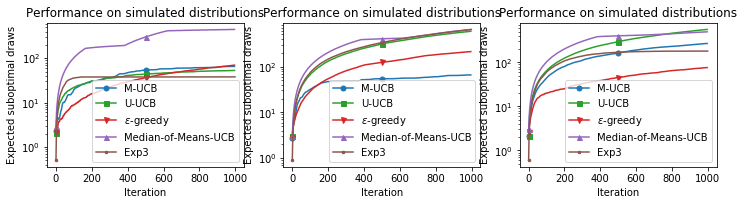

In [5]:
plot_eva(results_diff_envs, 'sd')

In [6]:
import pickle

#with open('results_diff_envs.pickle', 'wb') as handle:
#    pickle.dump(results_diff_envs, handle, protocol=pickle.HIGHEST_PROTOCOL)